<a href="https://colab.research.google.com/github/monikabuss/ISYS5002-2024-semester2/blob/main/04_3_Working_with_Files_Payslip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **File Input & Output**
For program to retain data between the times it is run, you must save the data
- Data is saved to a file, typically on computer disk
- Saved data can be retrieved and used at a later time

“***Writing data to***”: saving data on a file
<br>***Output file***: a file that data is written to
<br>*“**Reading data from**”*: process of retrieving data from a file
<br>***Input file***: a file from which data is read

Three steps when a program uses a file
- Open the file
- Process the file
- Close the file

**Types of files**
<br>
- A **text file** is a sequence of characters
- A **binary file** (for images, videos and more) is a sequence of bytes
- First character in a text file or byte in a binary file is located at position 0
  - In a file of n characters or bytes, the highest position number is n – 1 (**end-of-file marker**)
- For each file you **open**, Python creates a **file object** that you’ll use to interact with the file


**Comma-separated values (CSV) file**
- CSV files are the most common format used for importing and exporting data from spreadsheets and databases.
- CSV files are text files that have delimiters. A delimiter is a character that separates data values.



# CSV File

## Reading and Writing CSV file

Text files work fine when we are referencing small amounts of information, but when we use larger amounts of data, adding structure helps in organizing and retrieving values.

One common format found in business and social sciences alike (as well as any field concerned with data science) is the comma-separated values (CSV) format.

**CSV files** are the most common format used for importing and exporting data from spreadsheets and databases.

CSV files are text files that have delimiters.  A **delimiter** is a character that separates data values.

You can explore CSV files in spreadsheet software (such as Microsoft Excel), which will remove delimiters (usually commas) and store data values in separate cells.


One of the benefits of importing data files such as CSV files is the ability to read in a lot of data at once, parsing the data so your code can access individual values within the data. **By default, CSV files use commas (“,”) to separate data values**.



Imports the built-in **`csv` module** for working with CSV (Comma Separated Values) files, which are a common file format used for storing tabular data.

In [ ]:
#import csv module
import csv

## Writing data to file

In [ ]:
#Writing to a CSV file

#open file and write records
with open("sales_data.csv", 'w') as sales_data:

  '''
  Creates a writer object which will convert the user’s data into
  delimited strings on the given file-like object (payslip_data).
  '''
  writer = csv.writer(sales_data) # 'writer' object write data to the CSV file opened

  writer.writerow(['name', 'salary', 'sales'])

  writer.writerow(['Ram', '25000', '20000'])
  writer.writerow(['Radha', '30000', '40000'])

  # continue for for three more data



### Generalise it - User Input Storage in File

Take input form user and write to file

In [ ]:
import csv


with open("payslip_data.csv", 'w') as payslip_data:
  writer = csv.writer(payslip_data) # 'writer' object write data to the CSV file opened
  writer.writerow(['name', 'salary', 'sales', 'comm_rate'])

  # get user input - name
  name = input("Please enter name: ")

  # get user input for salary
  salary = int(input("Please enter salary: "))

  # get user input for sales
  sales = int(input("Please enter sales: "))

  # get user input for commission
  comm_rate = float(input("Please enter commission rate: "))

  # write user data to file
  writer.writerow([name, salary, sales, comm_rate])




### Dynamic Data Collection
Modify the code to prompt the user to decide if they want to continue.

In [ ]:
0with open("payslip_data.csv", 'w', newline = '') as payslip_data:
  writer = csv.writer(payslip_data) # 'writer' object write data to the CSV file opened
  writer.writerow(['name', 'salary', 'sales', 'comm_rate'])

  while True:
      # get user input - name
      name = input("Please enter name: ")

      # get user input for salary
      salary = int(input("Please enter salary: "))

      # get user input for sales
      sales = int(input("Please enter sales: "))

      # get user input for commission
      comm_rate = float(input("Please enter commission rate: "))
      # write user data to file
      writer.writerow([name, salary, sales, comm_rate])

      continue_input = input("Do you want to add another entry? (y/n): ")
      if continue_input == 'n':
        break

Please enter name: monika
Please enter salary: 50000
Please enter sales: 200
Please enter commission rate: 0.3
Do you want to add another entry? (y/n): y
Please enter name: ena
Please enter salary: 30000
Please enter sales: 400
Please enter commission rate: .4
Do you want to add another entry? (y/n): n


## Reading data from file

In [ ]:
with open('sales_data.csv', 'r') as file:
    csvreader = csv.reader(file)

    for row in csvreader:
        print(row) # print each row in the file


['name', 'salary', 'sales']
['Ram', '25000', '20000']
['Radha', '30000', '40000']


In [ ]:
# remove the header
with open('sales_data.csv', 'r') as file:
    csvreader = csv.reader(file)
    next(csvreader)  # Skip the header row

    for row in csvreader:
        print(row) # print each row in the file

['Ram', '25000', '20000']
['Radha', '30000', '40000']


### File Data Reading and Processing

In [ ]:
import csv

names = []
sales = []

# Read data from the CSV file
with open('sales_data.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        names.append(row[0])  # Name is in the first column
        sales.append(int(row[2]))  # Sales are in the third column

print(names)
print(sales)


['Ram', 'Radha']
[20000, 40000]


### Plotting graph

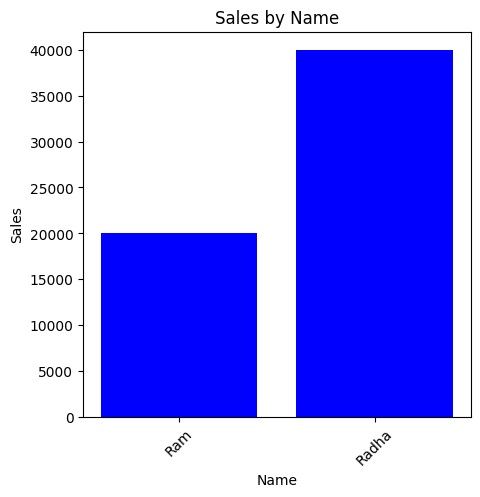

In [ ]:
import matplotlib.pyplot as plt

# Plotting the graph
plt.figure(figsize=(5, 5))  # Set the figure size
plt.bar(names, sales, color='blue')
plt.xlabel('Name')
plt.ylabel('Sales')
plt.title('Sales by Name')
plt.xticks(rotation=45)  # Rotate names for better visibility
plt.show()

## **Task:** Modify the payslip program to store the calculated commission, tax and net pay

In [28]:
def calculate_pay(salary,sales, comm_rate):
    commission = comm_rate * sales
    tax = (salary + commission) * 0.02
    pay = salary + commission - tax
    return pay, commission, tax
  #salary, commission= sales * commission rate, tax

In [30]:

with open("payslip_data.csv", 'w', newline = '') as payslip_data:
  writer = csv.writer(payslip_data) # 'writer' object write data to the CSV file opened
  writer.writerow(['name', 'salary', 'sales', 'comm_rate',  'commission', 'tax', 'net_pay'])

  while True:
      # get user input - name
      name = input("Please enter name: ")

      # get user input for salary
      salary = int(input("Please enter salary: "))

      # get user input for sales
      sales = int(input("Please enter sales: "))

      # get user input for commission
      comm_rate = float(input("Please enter commission rate: "))

      pay, commission, tax = calculate_pay(salary, sales, comm_rate)
# write user data to file
      writer.writerow([name, salary, sales, comm_rate, commission, tax, pay])

      continue_input = input("Do you want to add another entry? (y/n): ")
      if continue_input == 'n':
        break



Please enter name: monika
Please enter salary: 50000
Please enter sales: 300
Please enter commission rate: 0.5
Do you want to add another entry? (y/n): y
Please enter name: jakob
Please enter salary: 40000
Please enter sales: 700
Please enter commission rate: 0.7
Do you want to add another entry? (y/n): n
